<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Realizado por: Garcia Salazar Lizeth Estefania** 

**18-02-2021**

### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [2]:
# Escriba aquí su código para el ejercicio 1
def download_pubmed (keyword):
    """
    Funcion que sirve para buscar y nos da como resultado los ID de busqueda en pubmed
    """
def download_pubmed (keyword):
    """
    En esta parte del ejercicio se procedio con la función a la busqueda y la visualización de los resultados 
    en una lista de ID procedente de la busqueda en pubmed
    """
    from Bio import Entrez
    from Bio import SeqIO
    from Bio import GenBank
    Entrez.email = 'jhimy.siquihua@est.ikiam.edu.ec'
    handle = Entrez.esearch(db='pubmed',
                        sort='relevance',
                        retmax='200',
                        retmode='xml',
                        term=keyword)
    results = Entrez.read(handle)
    id_list = results["IdList"]
    ids = ','.join(id_list)
    Entrez.email = 'jhimy.siquihua@est.ikiam.edu.ec'
    handle = Entrez.efetch(db='pubmed',
                       retmode='xml',
                       id=ids)
    lista_id = ids.split(",")
    return (lista_id) 


import csv
import re
import pandas as pd
from collections import Counter

def mining_pubs(tipo):
    """ 
    Dicha funcion tiene como objetivo la entrada de las tres diferentes variables denominadas como "DP", "AU" y "AD" 
    y como resultado muestra un archivo de dataframe
    """
    with open("pubmed-EcuadorGen-set.txt", errors="ignore") as f: 
        texto = f.read() 
    if tipo == "DP":
        PMID = re.findall("PMID- (\d*)", texto) 
        year = re.findall("DP\s{2}-\s(\d{4})", texto)
        pmid_y = pd.DataFrame()
        pmid_y["PMID"] = PMID
        pmid_y["Año de publicación"] = year
        return (pmid_y)
    elif tipo == "AU": 
        PMID = re.findall("PMID- (\d*)", texto) 
        autores = texto.split("PMID- ")
        autores.pop(0)
        num_autores = []
        for i in range(len(autores)):
            numero = re.findall("AU -", autores[i])
            n = (len(numero))
            num_autores.append(n)
        pmid_a = pd.DataFrame()
        pmid_a["PMID"] = PMID 
        pmid_a["Cantidad de autores"] = num_autores
        return (pmid_a)
    elif tipo == "AD": 
        texto = re.sub(r" [A-Z]{1}\.","", texto)
        texto = re.sub(r"Av\.","", texto)
        texto = re.sub(r"Vic\.","", texto)
        texto = re.sub(r"Tas\.","", texto)
        AD = texto.split("AD  - ")
        n_paises = []
        for i in range(len(AD)): 
            pais = re.findall("\S, ([A-Za-z]*)\.", AD[i])
            if not pais == []: 
                if not len(pais) >= 2:  
                    if re.findall("^[A-Z]", pais[0]): 
                        n_paises.append(pais[0])
        conteo=Counter(n_paises)
        resultado = {}
        for clave in conteo:
            valor = conteo[clave]
            if valor != 1: 
                resultado[clave] = valor 
        veces_pais = pd.DataFrame()
        veces_pais["pais"] = resultado.keys()
        veces_pais["cantidad de autores"] = resultado.values()
        return (veces_pais)

import miningscience as msc
help(download_pubmed)
help(mining_pubs)


Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    En esta parte del ejercicio se procedio con la función a la busqueda y la visualización de los resultados 
    en una lista de ID procedente de la busqueda en pubmed

Help on function mining_pubs in module __main__:

mining_pubs(tipo)
    Dicha funcion tiene como objetivo la entrada de las tres diferentes variables denominadas como "DP", "AU" y "AD" 
    y como resultado muestra un archivo de dataframe




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
# Escriba aquí su código para el ejercicio 2
journals = download_pubmed ("Ecuador genomics")

print ("El numero de articulos es:", len(journals)) 

print ("El PMID del primer articulo es:", journals[0])

El numero de articulos es: 193
El PMID del primer articulo es: 31822297


In [ ]:
import os
os.getcwd()

## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [4]:
# Escriba aquí su código para el ejercicio 3
import miningscience as msc
pub_año = msc.mining_pubs("DP")
print (pub_año.iloc[0:5])
print (pub_año.iloc[680:0])
pub_autor = msc.mining_pubs("AU")
print (pub_autor.iloc[0:5])
print (pub_autor.iloc[680:0])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:5])
print (countries.iloc[120:])

       PMID Año de publicación
0  19844075               2010
1  31822297               2019
2  29632024               2018
3  32623267               2020
4  27577878               2017
Empty DataFrame
Columns: [PMID, Año de publicación]
Index: []
       PMID  Numero de autores
0  19844075                  2
1  31822297                  3
2  29632024                 33
3  32623267                 15
4  27577878                 93
Empty DataFrame
Columns: [PMID, Numero de autores]
Index: []
        pais  numero de autores
0    Ecuador               1205
1    Belgium                 90
2  Australia                110
3         TX                 69
4     Norway                 42
Empty DataFrame
Columns: [pais, numero de autores]
Index: []


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es:  2014.87077294686
La desviación estandar es:  6.804327940706898
         PMID  Numero de autores
0    19844075                  2
1    31822297                  3
2    29632024                 33
3    32623267                 15
4    27577878                 93
..        ...                ...
823  32917887                 30
824  33634602                102
825  28785301                173
826  27429642                173
827  31891233                728

[828 rows x 2 columns]


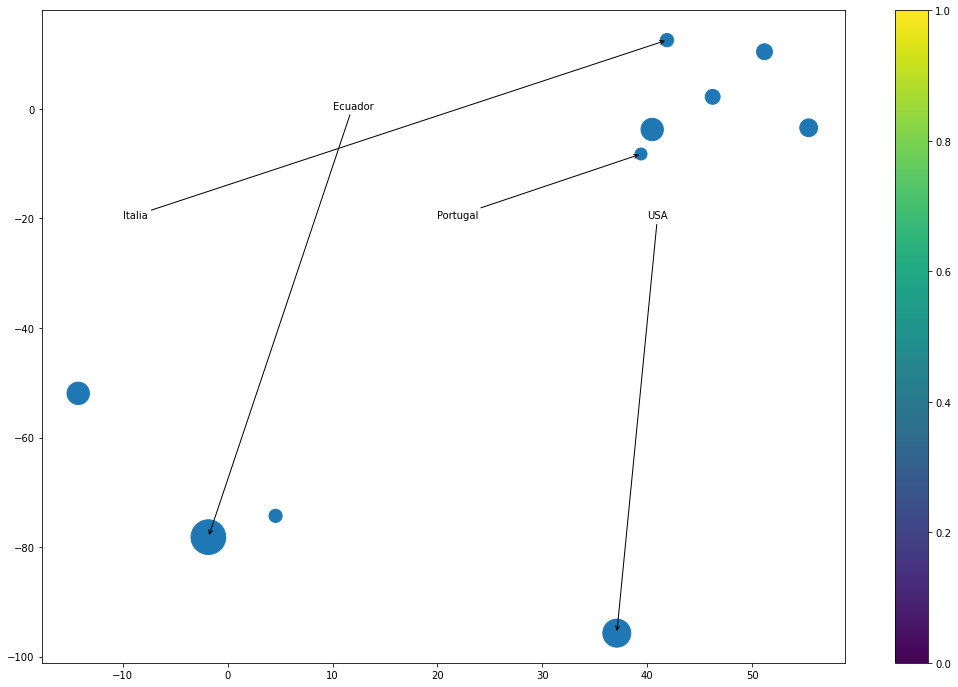

In [5]:
# Escriba aquí su código para el ejercicio 4
#Pub_year
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pub_año["Año de publicación"] = pub_año["Año de publicación"].astype("int")
mean_py = pub_año["Año de publicación"].mean()
sd_py = pub_año["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_año["Año de publicación"]), max(pub_año["Año de publicación"]))
plot.hist(x=pub_año["Año de publicación"], color = "blue")
plot.title("Articulos publicados en función del año")
plot.xlabel("Año")
plot.ylabel("Repeticiones")
# Pub_autors 
boxplot = pub_autor[0:827].boxplot(column=["Numero de autores"])
plot.title("Conteo de autores por articulos")
plot.ylabel("Frecuencia")
print (pub_autor)
# Gráfico de contries
countries = countries.sort_values("numero de autores")
max_pais = (countries[104:])

countries_lat = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239  ] 
                 
countries_long = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(countries_lat, countries_long, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Ecuador", xy = (-1.831239, -78.183406 ), 
             xytext = (10,0), arrowprops = ard) 
plot.annotate("USA", xy= (37.09024, -95.712891), 
            xytext = (40, -20), arrowprops = ard)
plot.annotate("Italia", xy= (41.87194, 12.56738), 
            xytext = (-10, -20), arrowprops = ard)
plot.annotate("Portugal", xy= (39.399872, -8.224454), 
            xytext = (20, -20), arrowprops = ard)
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**
- El primer el histograma muesta el incremento y disminusión de articulos con el paso del tiempo, es decir las publicaiones van en aumento con respecto al tiempo.

- El segundo se observa el boxplot muestra la frecuencia del conteo de los distintos autores por artículo.

- El tercer gráfico ilustra la cantidad de autores por país en la publicacion de los artículos, además se etiqueta a 4 países.

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

MW196737.1 Echovirus E30 isolate E30/COR/ARG/Mar_2017_24 capsid protein VP1 gene, partial cds...
Sequence length 315, 2 features, from: Echovirus E30
MW196736.1 Echovirus E30 isolate E30/COR/ARG/Mar_2017_145 capsid protein VP1 gene, partial cds...
Sequence length 315, 2 features, from: Echovirus E30
MW196735.1 Echovirus E30 isolate E30/COR/ARG/Apr_2017_14 capsid protein VP1 gene, partial cds...
Sequence length 315, 2 features, from: Echovirus E30
MW196734.1 Echovirus E30 isolate E30/FB/URY/Jun_2017_OTU-G capsid protein VP1 gene, partial cds...
Sequence length 324, 2 features, from: Echovirus E30
MW196733.1 Echovirus E30 isolate E30/BU/URY/Jun_2017_OTU-E capsid protein VP1 gene, partial cds...
Sequence length 324, 2 features, from: Echovirus E30
MW196732.1 Echovirus E30 isolate E30/BU/URY/Jun_2017_OTU-D capsid protein VP1 gene, partial cds...
Sequence length 324, 2 features, from: Echovirus E30
MW196731.1 Echovirus E30 isolate E30/FB/URY/Jul_2017_OTU-H capsid protein VP1 gene, partial c

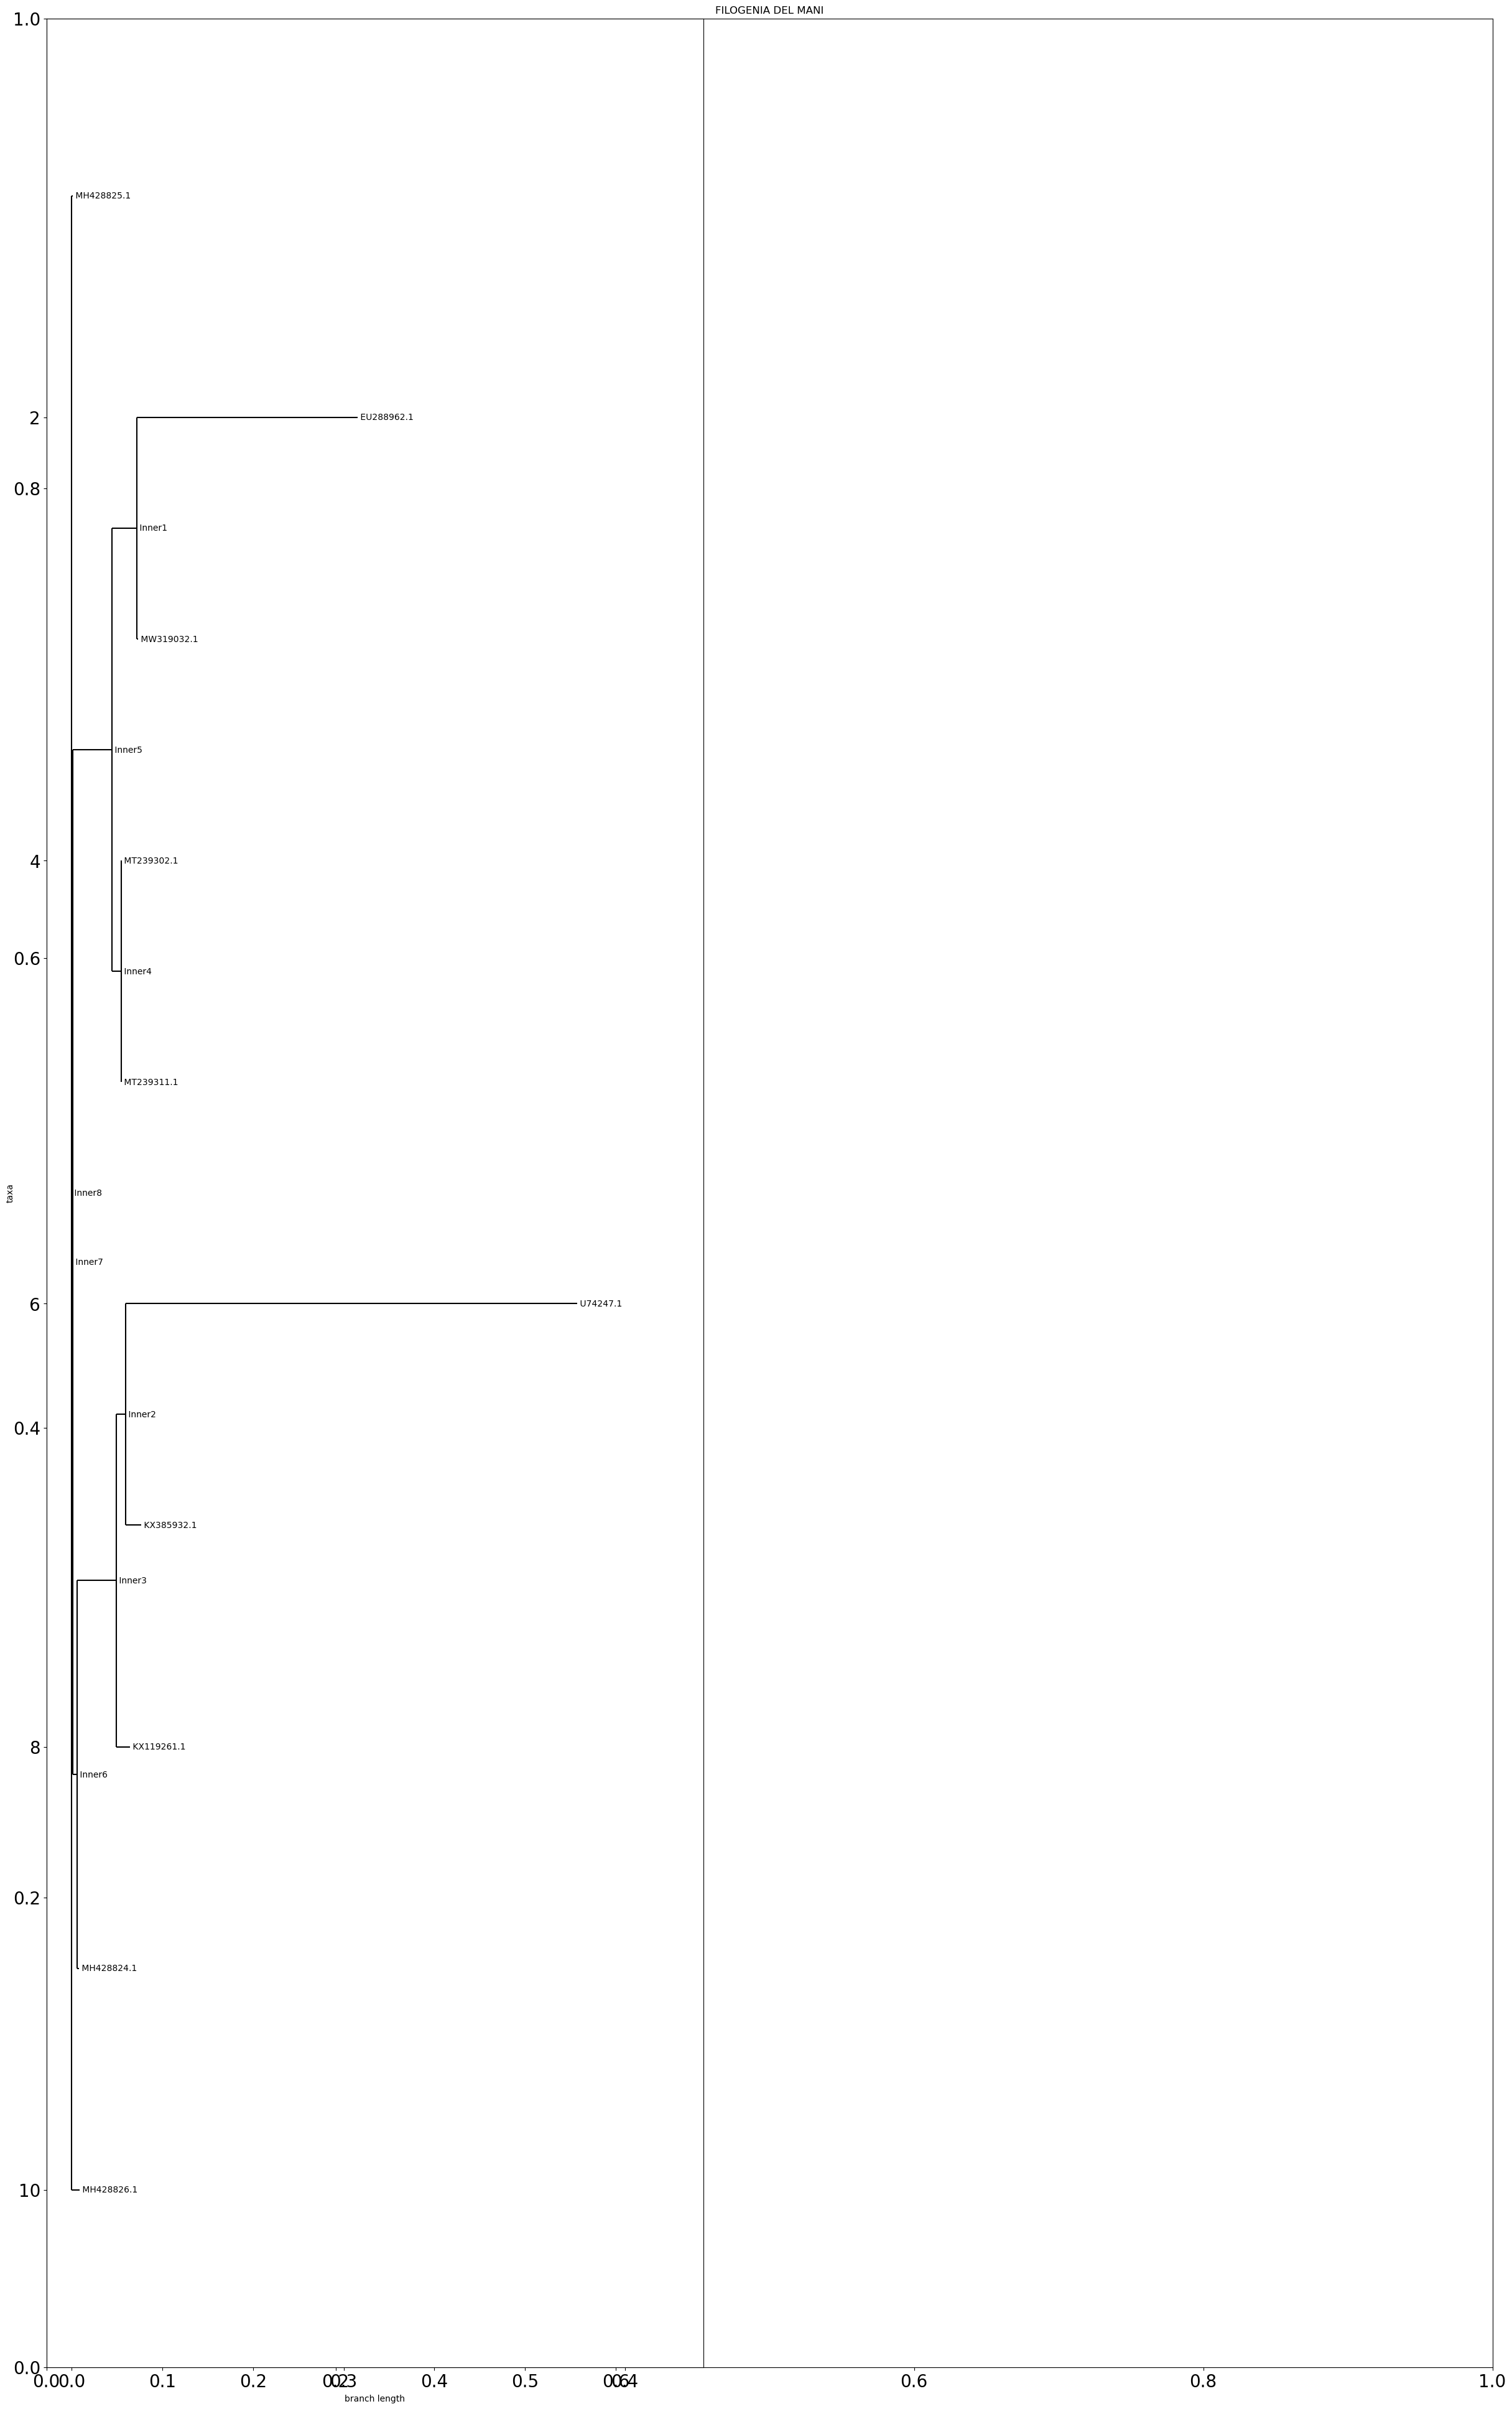

In [23]:
# Escriba aquí su código para el ejercicio 6
from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os
with open("data/sequence.seq") as s:#llamo a la base de datos donde estan las IDs
    Entrez.email = "lizeth.garcia@est.ikiam.edu.ec" 
    with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id='MW196737.1, MW196736.1, MW196735.1, MW196734.1, MW196733.1, MW196732.1, MW196731.1, MW196730.1, MW196729.1, MW196728.1'
                  ) as handle: #llamo a las 10 primeras secuencias de modo gb 
        for seq_record in SeqIO.parse(handle, "gb"): 
            print("%s %s..." % (seq_record.id, seq_record.description[:100])) 
            print( "Sequence length %i, %i features, from: %s" % ( len(seq_record), 
                                                                  len(seq_record.features), 
                                                                  seq_record.annotations["source"], ) )
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"##creo los dos archivos que me ayudan a crear el dendograma
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data/sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("data/sequence.aln", "clustal")#nucleotidos parecidos entre las especies identificadas por IDs
print(ClustalAlign[:10])##  10 primeros clados filogeneticos
from Bio import Phylo##CREACION del dendograma
tree = Phylo.read("data/sequence.dnd", "newick")
#----Phylo.draw_ascii(tree)## PARA imprimir el borrador del arbol 
#se llama al archivo .aln creado en la descarga de la data en el paso anterior
with open("data/sequence.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))## Para imprimir el borrador del arbol 
# Calcular las distancias mediante Distance Calculator
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)## se calcula la matriz de distancias

# Funcion para construccion del arbol filogenetico 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
staphy1_tree = constructor.build_tree(alignment)
staphy1_tree.rooted = True

# Guardar el arbol 
Phylo.write(staphy1_tree, "data/sequence.xml", "phyloxml")
arsequence = Phylo.read(file="data/sequence.xml", format= "phyloxml")
# Arbol  en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#Para tener eficiente visualización se utiliza el siguiente código 
fig = plt.figure(figsize=(30, 50), dpi=100) ## configuro el tamaño de imagen y la densidad de pixeles del mismo cuando guarde como imagen
# configuro el tamaño del cuadro en X Y Z para que no se sobrepongan los datos
matplotlib.rc('font', size=10)              
matplotlib.rc('xtick', labelsize=20)       
matplotlib.rc('ytick', labelsize=20) 
# Encabezado 
plt.title("FILOGENIA DEL MANI") 
axes = fig.add_subplot(1, 2, 1)
Phylo.draw(arsequence, axes=axes)
fig.savefig("data/sequence.png")


A traves del tiempo y las condiciones que eligieron para adaptarse a diferentes medios han ido separandose en diferentes especies y clados que se observan en la imágen (17 clados) desde un ancestro comun o clado filogenetico, más adelante está la especie mas alejada es decir la que contienen características fisióligas y morfológicas menores a la iniciales de las ramas principales de los clados de la que se separaron.

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```